In [38]:
import igl
import scipy as sp
import numpy as np
import os
import trimesh
import matplotlib.pyplot as plt

root_folder = r'C:\\Users\\William\\Files\\OConnor\\Code\\Projects\\objects'


v, f = igl.read_triangle_mesh(os.path.join(root_folder, "objects", "bump_domain.obj"))
u = v.copy()

# Find boundary vertices outside annulus
vrn = np.linalg.norm(v, axis = 1)
is_outer = [vrn[i] - 1.00 > -1e-15 for i in range(v.shape[0])]
is_inner = [vrn[i] - 0.15 < 1e-15 for i in range(v.shape[0])]
in_b = [is_outer[i] or is_inner[i] for i in range(len(is_outer))]

b = np.array([i for i in range(v.shape[0]) if (in_b[i])]).T
bc = np.zeros(b.size)

for bi in range(b.size):
    bc[bi] = 1.0 if is_outer[b[bi]] else 2.0

K=3
z = igl.harmonic_weights(v, f, b, bc, K)
u[:, 2] = z

mesh = trimesh.Trimesh(vertices=u, faces=f)
mesh.export("test.obj")

'# https://github.com/mikedh/trimesh\nv -0.00000000 -1.00000000 1.00000000\nv 0.00000000 1.00000000 1.00000000\nv -0.00000000 -0.08739049 2.00000000\nv 0.00000000 -1.06813341 1.00000000\nv 0.00000000 0.18875522 1.99426164\nv 0.00000000 1.07272836 1.00000000\nv -0.00000000 -0.20112439 1.99049287\nv 0.00000000 0.12063710 2.00000000\nv -0.13495552 0.64172774 1.27570950\nv -1.00000000 0.00000000 1.00000000\nv -0.62249472 0.87243491 1.00000000\nv -0.07591168 -0.96454938 1.00153987\nv -0.49203456 0.11170654 1.56879596\nv 0.56180736 -0.05327947 1.44891900\nv 0.56189696 -0.72929631 1.01047617\nv -0.71539456 -0.21630745 1.13888963\nv -0.88770816 0.67202032 1.00000000\nv -0.31685888 -0.34661451 1.63985147\nv 0.94220032 -0.66395358 1.00000000\nv 0.48023040 0.73979375 1.02453099\nv 1.00000000 -0.00000000 1.00000000\nv -0.50535424 1.03555136 1.00000000\nv -0.41752832 -0.08983067 1.72079799\nv -0.74840319 0.76318120 1.00000000\nv 0.89527297 0.96929110 1.00000000\nv 0.85989377 -0.07623317 1.03289105\

In [42]:
%matplotlib widget
import igl
import scipy as sp
import numpy as np
import os
import trimesh
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

root_folder = r'C:\\Users\\William\\Files\\OConnor\\Code\\Projects\\objects'


v, f = igl.read_triangle_mesh(os.path.join(root_folder, "objects", "bump_domain.obj"))
u = v.copy()

# Find boundary vertices outside annulus
vrn = np.linalg.norm(v, axis = 1)
is_outer = [vrn[i] - 1.00 > -1e-15 for i in range(v.shape[0])]
is_inner = [vrn[i] - 0.15 < 1e-15 for i in range(v.shape[0])]
in_b = [is_outer[i] or is_inner[i] for i in range(len(is_outer))]

# Modify inner points
u[is_inner, 2] = 3  # Shift up interior vertices
b = np.array([i for i in range(v.shape[0]) if (in_b[i])]).T
bc = np.zeros([b.size, v.shape[1]])

for bi in range(b.size):
    bc[bi] = u[b[bi]]
    # bc[bi] = 0.0 if is_outer[b[bi]] else 1.0

K=3
z = igl.harmonic_weights(v, f, b, bc, K)

mesh = trimesh.Trimesh(vertices=u, faces=f)
# z = mesh.export("test.obj")


# Interpretations
# v = vertices
# f = faces
# b = boundary vertices (off-limits)

ipykernel_launcher:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.


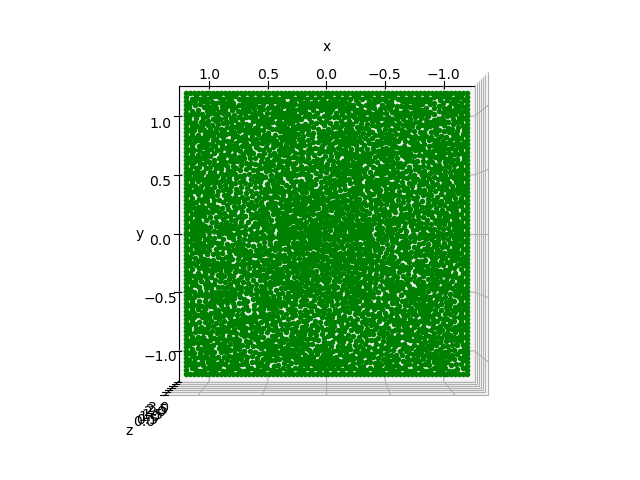

In [43]:
# Plot points
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.view_init(elev=-90, azim=90)

# Entire mesh
x, y, z = z.T
ax.plot(x, y, z, ".", color="green")

# # Inner
# x, y, z = v[is_inner].T
# ax.plot(x, y, z, ".", color="red")

# # Outer
# x, y, z = v[is_outer].T
# ax.plot(x, y, z, ".", color="blue")

# # Outer
# x, y, z = v[in_b].T
# ax.plot(x, y, z, ".", color="purple")
# # S Points
# x, y, z = mesh.vertices[b].T
# ax.plot(x, y, z, ".", color="red")

plt.show()